In [170]:
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from tqdm import tqdm

In [171]:
def initialize_weights(d0, d1):
    return np.random.randn(d0, d1)

In [172]:
def forward(X):
    model["q"] = np.dot(X, model["w"]) 
    model["h"] = model["q"] + model["b"]
    return model

In [173]:
def compute_loss(y_true, y_pred, reduce="mean"):
    if reduce == "mean":
        return np.mean(np.square(y_pred-y_true))
    elif reduce == "sum":
        return np.sum(np.square(y_pred-y_true))
    else:
        return np.square(y_pred-y_true)

# Computational Graph
<img src = "computational_graph.png">

In [174]:
def backward(X, y):
    
    # More in the deck
    model["dldh"] = (model["h"]-y) 
    model["dhdq"] = np.eye(N = (model["q"].shape[0]*model["q"].shape[1]), 
                           M = (model["h"].shape[0]*model["h"].shape[1]))
    
    model["dldq"] = np.dot(model["dhdq"], model["dldh"])
    
    model["dhdb"] = np.ones(shape = model["h"].shape)
    model["dldb"] = np.dot(model["dhdb"].T, model["dldh"])


    model["dldq"] = np.dot(model["dhdq"], model["dldh"])
    model["dldw"] = np.dot(X.T, model["dldq"])
    
    return model

In [175]:
def generate_batches(features, target, batch_idx, mini_batch_size):

    batch_X = features[batch_idx*mini_batch_size: (batch_idx+1)*mini_batch_size]
    batch_y = target[batch_idx*mini_batch_size: (batch_idx+1)*mini_batch_size]
    yield batch_X, batch_y

In [176]:
def shuffle_dataset(features, target):
    indices = np.arange(0, train_X.shape[0])
    shuffled_indices = np.random.choice(a=indices, size=len(indices))
    return features[shuffled_indices], target[shuffled_indices]

In [177]:

def scale(X, y=None, X_max=None, y_max=None, fit=True):
    if fit:
        X_max = np.max(X, axis = 0)
        y_max = np.max(y, axis = 0)
        
        X = X/X_max
        y = y/y_max
        
        return X, y, X_max, y_max
    
    elif y is not None:
        return X/X_max, y/y_max
    else:
        return X/X_max

In [178]:
def fit(features, target, epochs, mini_batch_size, learning_rate, iterations, evaluate=False):
    for epoch in range(epochs):
        train_epoch_loss = 0
        test_epoch_loss = 0
        epoch_loss = 0
        test_loss = 0
        iteration = 0
        while iteration<iterations:
            
            # Generate Random Batches
            for batch_X, batch_y in generate_batches(features, target, iteration, mini_batch_size):
                loss = 0
                
                # Forward Propogation
                model = forward(batch_X)
                
                model["dldw"] = 0
                model["dldb"] = 0
                model["dldh"] = 0
                model["dhdq"] = 0
                model["dldq"] = 0
                model["dhdb"] = 0
                model["dldb"] = 0
                model["dldq"] = 0
                model["dqdw"] = 0
                
                # Backward Propogation
                model = backward(batch_X, batch_y)
                
                # Update Weights
                model["w"]=model["w"]-learning_rate*model["dldw"]
                model["b"] = model["b"]-learning_rate*model["dldb"]
                
            
                loss += compute_loss(batch_y, model["h"])
                
            
            iteration+=1
            train_epoch_loss = loss/iterations
       
    
        

        if epoch % 9 == 0:
            print("Epoch : {}".format(epoch))
            print("\tTrain : {}".format(loss))
            
            
            if test_X.shape[0]>0:
                test_pred = forward(test_X)["h"]
                test_loss = compute_loss(test_y, model["h"])
                print("\t Test : {}".format(test_loss))
               
    return model

# Toy example - example from the deck

In [179]:
x = np.array([[0.1], [0.2]])
w = np.array([[0.198]])

b = np.array([[0]])
y_true = np.array([[1], [2]])

In [180]:
model = dict()
model["w"] = w
model["b"] = b

In [181]:
for param, value in model.items():
    print("Param : {}".format(param))
    print(value, end  = "\n\n")

Param : w
[[0.198]]

Param : b
[[0]]



Forward Propagation

In [182]:
model = forward(x)
for param, value in model.items():
    print("Param : {}".format(param))
    print(value, end  = "\n\n")
    

Param : w
[[0.198]]

Param : b
[[0]]

Param : q
[[0.0198]
 [0.0396]]

Param : h
[[0.0198]
 [0.0396]]



Backward Propagation

In [183]:

model = backward(x, y_true)
for param, value in model.items():
    print("Param : {}".format(param))
    print(value, end  = "\n\n")
    

Param : w
[[0.198]]

Param : b
[[0]]

Param : q
[[0.0198]
 [0.0396]]

Param : h
[[0.0198]
 [0.0396]]

Param : dldh
[[-0.9802]
 [-1.9604]]

Param : dhdq
[[1. 0.]
 [0. 1.]]

Param : dldq
[[-0.9802]
 [-1.9604]]

Param : dhdb
[[1.]
 [1.]]

Param : dldb
[[-2.9406]]

Param : dldw
[[-0.4901]]



# Larger dataset

In [184]:

def generate_data(size, feature_size=1):
    
    np.random.seed(9)

    # Generate random data points between 0 and 1
    X = np.random.normal(loc = 0, scale=1, size = (size, feature_size))
    # Generate dependent variable by adding random normal noise to X
    y = np.mean(X, axis=1).reshape(-1,1) + np.random.normal(loc=0, scale=0.5, size=(size, 1))
    # Add a new feature with all 1s to account for bias
    
    return X, y




X_all, y_all = generate_data(size=5000)


from sklearn.model_selection import train_test_split
train_X,  test_X, train_y, test_y = train_test_split(X_all, y_all, test_size=0.2, 
                                                    shuffle=True, random_state=9)
print(train_X.shape, train_y.shape, test_X.shape,  test_y.shape)

train_X,  train_y, max_X, max_y = scale(train_X,train_y, fit=True)
test_X, test_y = scale(test_X, test_y, X_max = max_X, y_max = max_y, fit=False)

(4000, 1) (4000, 1) (1000, 1) (1000, 1)


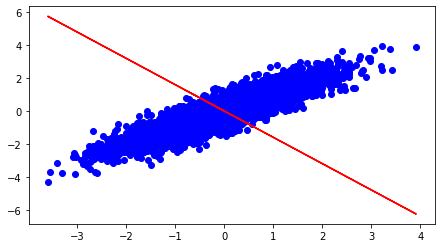

In [185]:

MINI_BATCH_SIZE = 32
ITERATIONS = train_X.shape[0]//MINI_BATCH_SIZE
EPOCHS = 100
LEARNING_RATE = 1e-3
HIDDEN_UNITS = 2
model = dict()
model["w"] = initialize_weights(train_X.shape[1], 1)
# https://cs231n.github.io/neural-networks-2/#init
model["b"] = np.zeros((1, 1))


fig = plt.figure(figsize  = (16, 4))
fig.add_subplot(121)
plt.scatter(X_all[:,0], y_all, color = "blue")


y_pred = forward(X_all)["h"]
plt.plot(X_all[:,0], y_pred, color = "red")
plt.show()



In [186]:
model = fit(features = train_X, 
            target = train_y, 
            epochs=EPOCHS, 
            mini_batch_size=MINI_BATCH_SIZE, 
            learning_rate=LEARNING_RATE, 
            iterations=ITERATIONS, evaluate = True)

Epoch : 0
	Train : 0.32238261244032884
	 Test : 0.2758539916123502
Epoch : 9
	Train : 0.01599640265489709
	 Test : 0.018106838045250276
Epoch : 18
	Train : 0.014158185070977469
	 Test : 0.01597513308421123
Epoch : 27
	Train : 0.01419755235199096
	 Test : 0.015951335232208833
Epoch : 36
	Train : 0.01420269090464684
	 Test : 0.015950538363879732
Epoch : 45
	Train : 0.014203162725261786
	 Test : 0.015950477795542987
Epoch : 54
	Train : 0.014203204962504466
	 Test : 0.01595047247120693
Epoch : 63
	Train : 0.014203208735153246
	 Test : 0.01595047199641234
Epoch : 72
	Train : 0.014203209072060912
	 Test : 0.01595047195401811
Epoch : 81
	Train : 0.014203209102147141
	 Test : 0.015950471950232307
Epoch : 90
	Train : 0.014203209104833869
	 Test : 0.01595047194989423
Epoch : 99
	Train : 0.014203209105073791
	 Test : 0.01595047194986404


In [187]:
def predict(X, scaled=True):
    # Preprocess
    if not scaled:
        X= scale(X=X, y=None, X_max=max_X, y_max=max_y, fit=False)
    # Predict
    y_pred = forward(X)["h"]
    # Return 
    return y_pred

In [188]:
def plot_predictions(model, features, target, title):
    
    y_pred = predict(features, scaled=True)
    sort_index = np.argsort(target, axis = 0)
    plt.scatter(features[sort_index], target[sort_index])
    plt.scatter(features[sort_index], y_pred[sort_index])
    plt.legend(["Actual", "Predicted"])
    plt.title(title)
    return y_pred

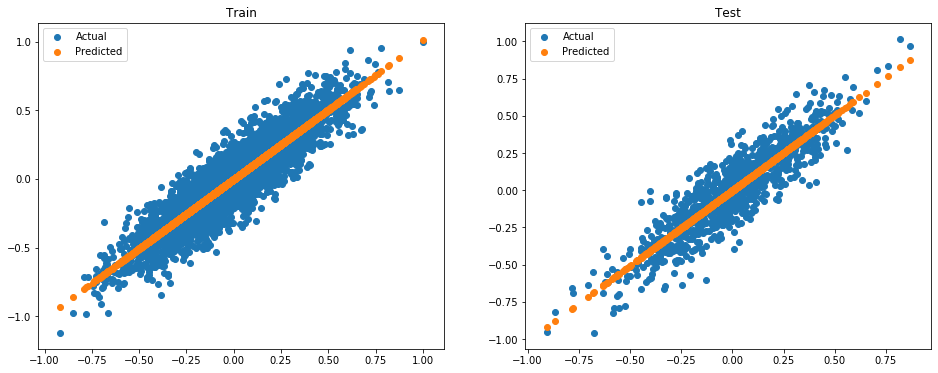

In [189]:
fig = plt.figure(figsize = (16, 6))
fig.add_subplot(121)
train_predictions = plot_predictions(model, train_X, train_y, title = "Train")
fig.add_subplot(122)
test_predictions = plot_predictions(model, test_X, test_y, title = "Test")

In [190]:
def get_metrics(features, target):
    from sklearn.metrics import r2_score
    prediction = predict(features, scaled=True)
    r2 = r2_score(target, prediction)
    print("R2 Score: {}".format(r2))

In [191]:
get_metrics(train_X, train_y)

R2 Score: 0.8073101480487217


In [192]:
get_metrics(test_X, test_y)

R2 Score: 0.8077818234081525
